https://courses.edx.org/courses/course-v1:MITx+15.071x_3+1T2016/courseware/5abd4e9833ed47b2b4eae8827f83d516/aa754f6d17194f3b8a29ec37b8a7f32a/

Earlier in the course, we used text analytics as a predictive tool, using word frequencies as independent variables in our models. However, sometimes our goal is to understand commonly occurring topics in text data instead of to predict the value of some dependent variable. In such cases, word clouds can be a visually appealing way to display the most frequent words in a body of text.

A word cloud arranges the most common words in some text, using size to indicate the frequency of a word. For instance, this is a word cloud for the complete works of Shakespeare, removing English stopwords:

Shakespeare word cloud

While we could generate word clouds using free generators available on the Internet, we will have more flexibility and control over the process if we do so in R. We will visualize the text of tweets about Apple, a dataset we used earlier in the course. As a reminder, this dataset (which can be downloaded from tweets.csv) has the following variables:

Tweet -- the text of the tweet

Avg -- the sentiment of the tweet, as assigned by users of Amazon Mechanical Turk. The score ranges on a scale from -2 to 2, where 2 means highly positive sentiment, -2 means highly negative sentiment, and 0 means neutral sentiment.

In [1]:
tweets= read.csv("tweets.csv",stringsAsFactors = FALSE)
str(tweets)

'data.frame':	1181 obs. of  2 variables:
 $ Tweet: chr  "I have to say, Apple has by far the best customer care service I have ever received! @Apple @AppStore" "iOS 7 is so fricking smooth & beautiful!! #ThanxApple @Apple" "LOVE U @APPLE" "Thank you @apple, loving my new iPhone 5S!!!!!  #apple #iphone5S pic.twitter.com/XmHJCU4pcb" ...
 $ Avg  : num  2 2 1.8 1.8 1.8 1.8 1.8 1.6 1.6 1.6 ...


In [2]:
library(tm)

Loading required package: NLP


In [3]:
library(SnowballC)

Warning message:
: package ‘SnowballC’ was built under R version 3.3.0

In [4]:
corpus = Corpus(VectorSource(tweets$Tweet))

In [5]:
corpus[[1]]$content

[1] "I have to say, Apple has by far the best customer care service I have ever received! @Apple @AppStore"

In [6]:
corpus = tm_map(corpus,tolower)

In [7]:
corpus = tm_map(corpus, PlainTextDocument)

In [8]:
corpus[[1]]$content

[1] "i have to say, apple has by far the best customer care service i have ever received! @apple @appstore"

In [9]:
corpus = tm_map(corpus, removePunctuation)

In [10]:
corpus = tm_map(corpus, removeWords, stopwords("english"))

In [11]:
corpus[[1]]$content

[1] "   say apple   far  best customer care service   ever received apple appstore"

In [12]:
DTM = DocumentTermMatrix(corpus)

In [13]:
str(DTM)

List of 6
 $ i       : int [1:10273] 1 1 1 1 1 1 1 1 1 1 ...
 $ j       : int [1:10273] 225 254 374 528 775 1071 1135 2800 2949 3020 ...
 $ v       : num [1:10273] 2 1 1 1 1 1 1 1 1 1 ...
 $ nrow    : int 1181
 $ ncol    : int 3780
 $ dimnames:List of 2
  ..$ Docs : chr [1:1181] "character(0)" "character(0)" "character(0)" "character(0)" ...
  ..$ Terms: chr [1:3780] "000" "075" "0909" "0910" ...
 - attr(*, "class")= chr [1:2] "DocumentTermMatrix" "simple_triplet_matrix"
 - attr(*, "weighting")= chr [1:2] "term frequency" "tf"


In [14]:
findFreqTerms(DTM, lowfreq = 20)

[1] "android"              "app"                  "apple"               
 [4] "apples"               "back"                 "better"              
 [7] "can"                  "cant"                 "dont"                
[10] "fingerprint"          "freak"                "get"                 
[13] "google"               "ios"                  "ios7"                
[16] "ipad"                 "iphone"               "iphone5c"            
[19] "iphone5s"             "iphones"              "ipod"                
[22] "ipodplayerpromo"      "itune"                "itunes"              
[25] "just"                 "like"                 "lol"                 
[28] "love"                 "make"                 "microsoft"           
[31] "need"                 "new"                  "now"                 
[34] "one"                  "phone"                "please"              
[37] "promo"                "promoipodplayerpromo" "really"              
[40] "samsung"              "store"                "thanks"              
[43] "think"                "time"                 "twitter"             
[46] "via"                  "want"                 "well"                
[49] "will"

In [15]:
allTweets = as.data.frame(as.matrix(DTM))

In [16]:
str(allTweets)

'data.frame':	1181 obs. of  3780 variables:
 $ 000                                                                                                                : num  0 0 0 0 0 0 0 0 0 0 ...
 $ 075                                                                                                                : num  0 0 0 0 0 0 0 0 0 0 ...
 $ 0909                                                                                                               : num  0 0 0 0 0 0 0 0 0 0 ...
 $ 0910                                                                                                               : num  0 0 0 0 0 0 0 0 0 0 ...
 $ 099                                                                                                                : num  0 0 0 0 0 0 0 0 0 0 ...
 $ 100                                                                                                                : num  0 0 0 0 0 0 0 0 0 0 ...
 $ 100m                                                       

In [17]:
library(wordcloud)

Warning message:
: package ‘wordcloud’ was built under R version 3.3.0Loading required package: RColorBrewer
Warning message:
: package ‘RColorBrewer’ was built under R version 3.3.0

In [18]:
.Library

[1] "/home/varun/anaconda3/lib64/R/library"

In [19]:
?wordcloud

wordcloud              package:wordcloud               R Documentation

_P_l_o_t _a _w_o_r_d _c_l_o_u_d

_D_e_s_c_r_i_p_t_i_o_n:

     Plot a word cloud

_U_s_a_g_e:

     wordcloud(words,freq,scale=c(4,.5),min.freq=3,max.words=Inf,
             random.order=TRUE, random.color=FALSE, rot.per=.1,
             colors="black",ordered.colors=FALSE,use.r.layout=FALSE,
             fixed.asp=TRUE, ...)
     
_A_r_g_u_m_e_n_t_s:

   words: the words

    freq: their frequencies

   scale: A vector of length 2 indicating the range of the size of the
          words.

min.freq: words with frequency below min.freq will not be plotted

max.words: Maximum number of words to be plotted. least frequent terms
          dropped

random.order: plot words in random order. If false, they will be
          plotted in decreasing frequency

random.color: choose colors randomly from the colors. If false, the
          color is chosen based on the frequency

 rot.per: proportion words with 90 degree rotation

  colors: color words from least to most frequent

ordered.colors: if true, then colors are assigned to words in order

use.r.layout: if false, then c++ code is used for collision detection,
          otherwise R is used

fixed.asp: if TRUE, the aspect ratio is fixed. Variable aspect ratio
          only supported if rot.per==0

     ...: Additional parameters to be passed to text (and
          strheight,strwidth).

_D_e_t_a_i_l_s:

     If freq is missing, then words can either be a character vector,
     or Corpus. If it is a vector and freq is missing, standard stop
     words will be removed prior to plotting.

_V_a_l_u_e:

     nothing

_S_e_e _A_l_s_o:

     ‘text’

_E_x_a_m_p_l_e_s:

     wordcloud(c(letters, LETTERS, 0:9), seq(1, 1000, len = 62))
     
     if(require(tm)){
     
             #####                   from character          #####
             wordcloud(
     "Many years ago the great British explorer George Mallory, who 
     was to die on Mount Everest, was asked why did he want to climb 
     it. He said, \"Because it is there.\"
     
     Well, space is there, and we're going to climb it, and the 
     moon and the planets are there, and new hopes for knowledge 
     and peace are there. And, therefore, as we set sail we ask 
     God's blessing on the most hazardous and dangerous and greatest 
     adventure on which man has ever embarked.",
             ,random.order=FALSE)
     
     ## Not run:
     
             data(crude)
             crude <- tm_map(crude, removePunctuation)
             crude <- tm_map(crude, function(x)removeWords(x,stopwords()))
             
             #####                   from corpus             #####
             wordcloud(crude)
             
             
             #####           from frequency counts   #####
             tdm <- TermDocumentMatrix(crude)
             m <- as.matrix(tdm)
             v <- sort(rowSums(m),decreasing=TRUE)
             d <- data.frame(word = names(v),freq=v)
             
             wordcloud(d$word,d$freq)
     
             #A bigger cloud with a minimum frequency of 2
             wordcloud(d$word,d$freq,c(8,.3),2)
     
             #Now lets try it with frequent words plotted first
             wordcloud(d$word,d$freq,c(8,.5),2,,FALSE,.1)
     
             #####                   with colors             #####
             if(require(RColorBrewer)){
     
                     pal <- brewer.pal(9,"BuGn")
                     pal <- pal[-(1:4)]
                     wordcloud(d$word,d$freq,c(8,.3),2,,FALSE,,.15,pal)
     
     
                     pal <- brewer.pal(6,"Dark2")
                     pal <- pal[-(1)]
                     wordcloud(d$word,d$freq,c(8,.3),2,,TRUE,,.15,pal)
                     
                     #random colors
                     wordcloud(d$word,d$freq,c(8,.3),2,,TRUE,TRUE,.15,pal)
             }
             #####                   with font  

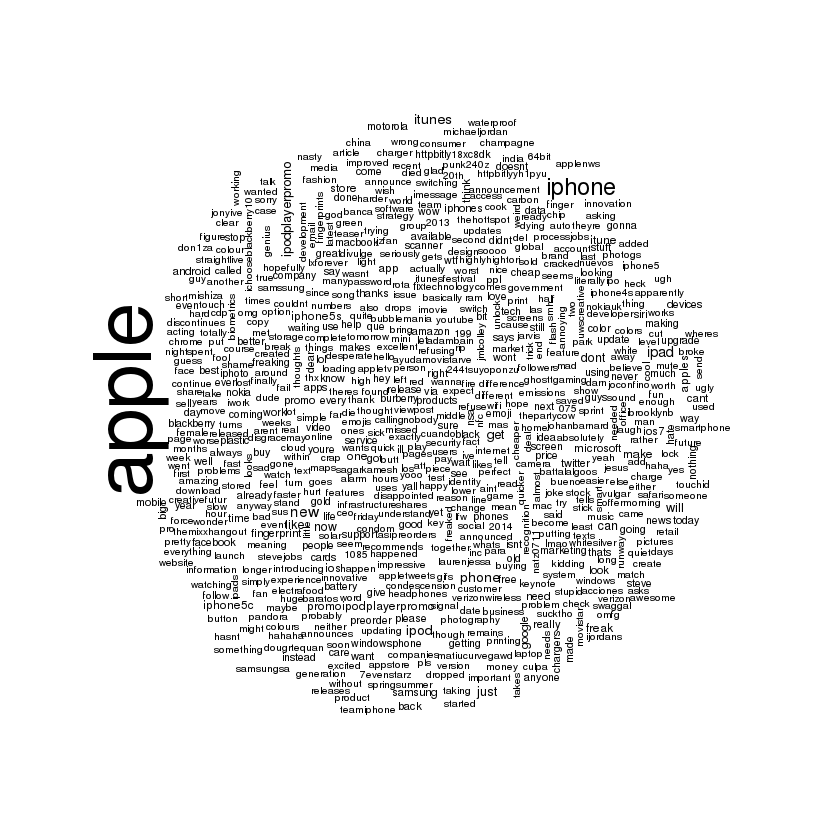

In [20]:
wordcloud(colnames(allTweets),colSums(allTweets),scale=c(4,.5))

In [21]:
corpus = Corpus(VectorSource(tweets$Tweet))

corpus[[1]]$content

corpus = tm_map(corpus,tolower)

corpus = tm_map(corpus, PlainTextDocument)

corpus[[1]]$content

corpus = tm_map(corpus, removePunctuation)

corpus = tm_map(corpus, removeWords, c("apple",stopwords("english")))


DTM = DocumentTermMatrix(corpus)


allTweets = as.data.frame(as.matrix(DTM))


[1] "I have to say, Apple has by far the best customer care service I have ever received! @Apple @AppStore"

[1] "i have to say, apple has by far the best customer care service i have ever received! @apple @appstore"

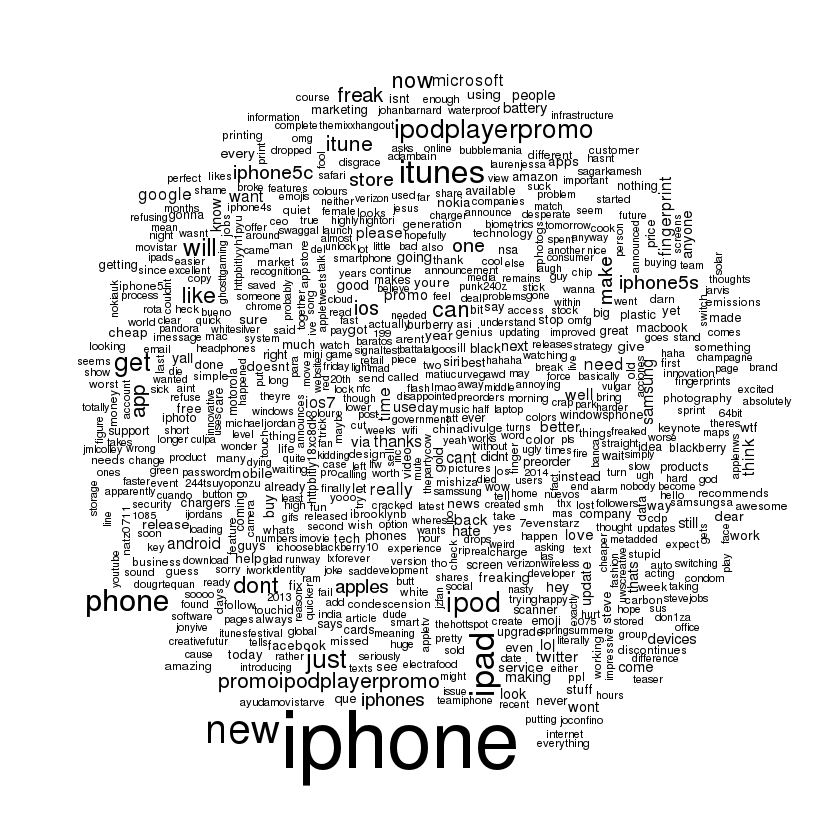

In [22]:
wordcloud(colnames(allTweets),colSums(allTweets),scale=c(4,.5))

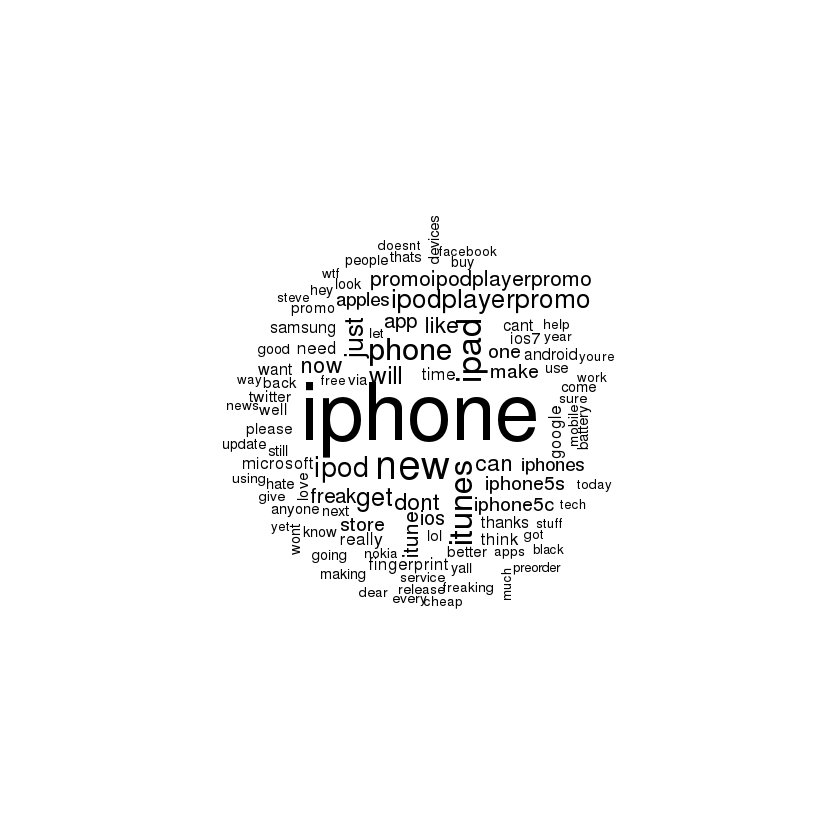

In [23]:
wordcloud(colnames(allTweets),colSums(allTweets),scale=c(4,.5), random.order = FALSE,max.words= 100)

In [24]:
corpus1 = Corpus(VectorSource(subset(tweets$Tweet,tweets$Avg<=-1)))

corpus1[[1]]$content

corpus1 = tm_map(corpus1,tolower)

corpus1 = tm_map(corpus1, PlainTextDocument)

corpus1[[1]]$content

corpus1 = tm_map(corpus1, removePunctuation)

corpus1 = tm_map(corpus1, removeWords, c("apple",stopwords("english")))


DTM1 = DocumentTermMatrix(corpus1)


allTweets1 = as.data.frame(as.matrix(DTM1))

[1] "Because @Apple has no idea how real people work, I have to erase my iphone & start over just for re-installing itunes after a new OS. #fun"

[1] "because @apple has no idea how real people work, i have to erase my iphone & start over just for re-installing itunes after a new os. #fun"

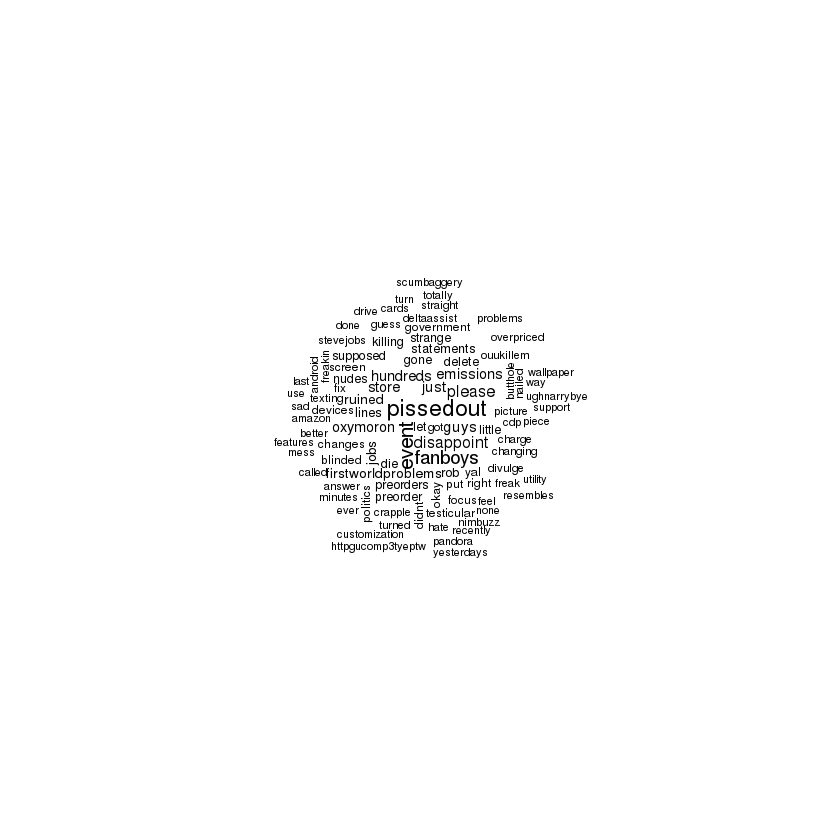

In [25]:
wordcloud(colnames(allTweets1),colSums(allTweets),scale=c(4,.5),max.words= 500,random.order = FALSE)

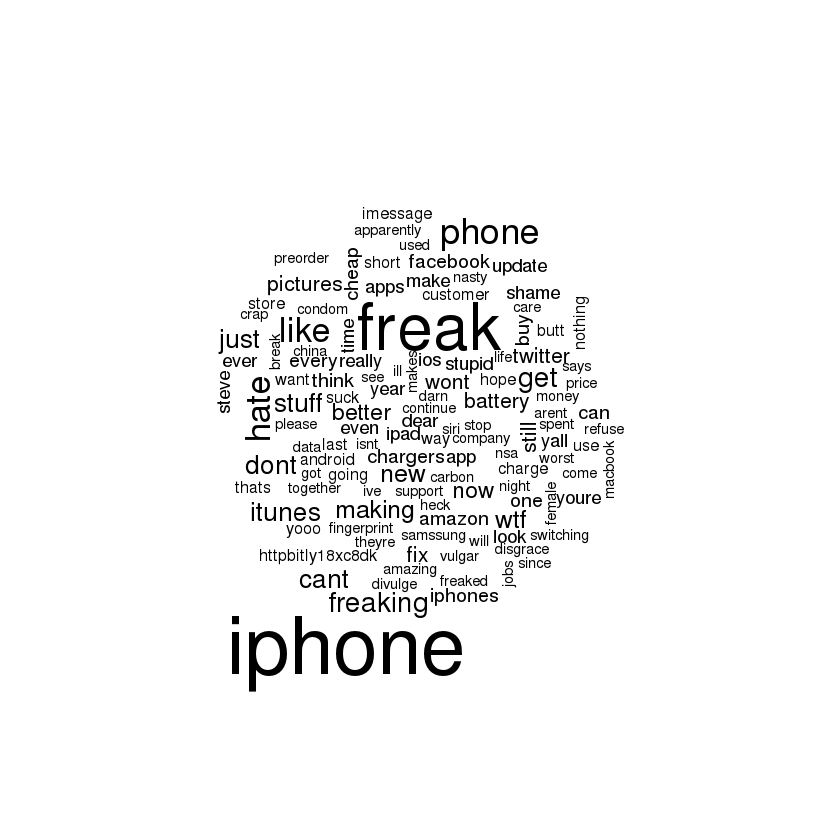

In [26]:
negativeTweets = subset(allTweets, tweets$Avg <= -1)
wordcloud(colnames(negativeTweets), colSums(negativeTweets)) 

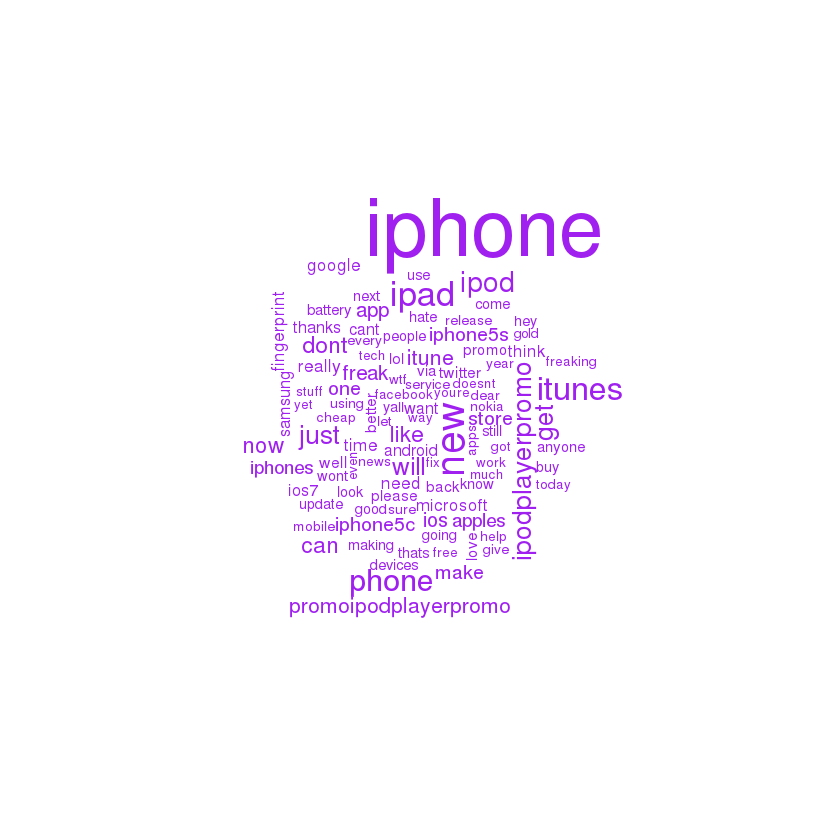

In [27]:

wordcloud(colnames(allTweets),colSums(allTweets),scale=c(4,.5), color="purple", random.color=FALSE,max.words= 100)

In [28]:
library(RColorBrewer)

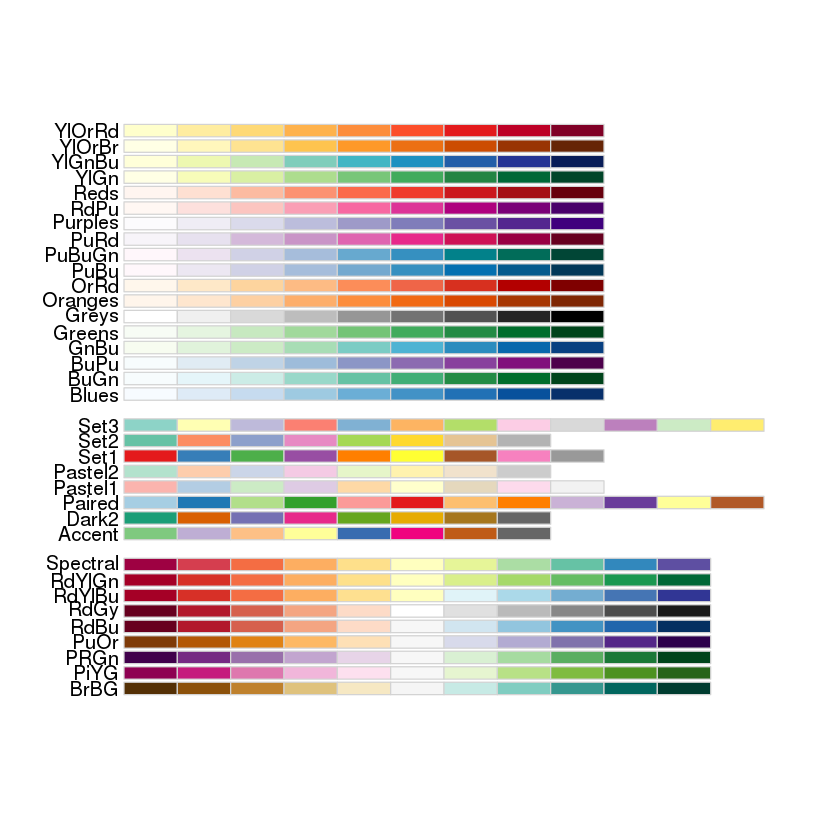

In [29]:
display.brewer.all()

In [32]:
?brewer.pal

RColorBrewer           package:RColorBrewer            R Documentation

_C_o_l_o_r_B_r_e_w_e_r _p_a_l_e_t_t_e_s

_D_e_s_c_r_i_p_t_i_o_n:

     Creates nice looking color palettes especially for thematic maps

_U_s_a_g_e:

     brewer.pal(n, name)
     display.brewer.pal(n, name)
     display.brewer.all(n=NULL, type="all", select=NULL, exact.n=TRUE, 
     colorblindFriendly=FALSE)
     brewer.pal.info
     
_A_r_g_u_m_e_n_t_s:

       n: Number of different colors in the palette, minimum 3, maximum
          depending on palette

    name: A palette name from the lists below

    type: One of the string "div", "qual", "seq", or "all"

  select: A list of names of existing palettes

 exact.n: If TRUE, only display palettes with a color number given by n

colorblindFriendly: if TRUE, display only colorblind friendly palettes

_D_e_t_a_i_l_s:

     ‘brewer.pal’ makes the color palettes from ColorBrewer available
     as R palettes.

     ‘display.brewer.pal()’ displays the selected palette in a graphics
     window.

     ‘display.brewer.all()’ displays the a few palettes simultanueously
     in a graphics window.

     ‘brewer.pal.info’ returns information about the available palettes
     as a dataframe. ‘brewer.pal.info’ is not a function, it is a
     variable. This might change in the future.

     For details and an interactive palette selection tools see
     http://colorbrewer.org. It is free to use, although ColorBrewer's
     designers would appreciate it if you could cite the ColorBrewer
     project if you decide to use one of our color schemes.

     There are 3 types of palettes, sequential, diverging, and
     qualitative.
     1. Sequential palettes are suited to ordered data that progress
     from low to high.  Lightness steps dominate the look of these
     schemes, with light colors for low data values to dark colors for
     high data values.
     2. Diverging palettes put equal emphasis on mid-range critical
     values and extremes at both ends of the data range. The critical
     class or break in the middle of the legend is emphasized with
     light colors and low and high extremes are emphasized with dark
     colors that have contrasting hues.
     3. Qualitative palettes do not imply magnitude differences between
     legend classes, and hues are used to create the primary visual
     differences between classes.  Qualitative schemes are best suited
     to representing nominal or categorical data.

     The sequential palettes names are
     Blues BuGn BuPu GnBu Greens Greys Oranges OrRd PuBu PuBuGn PuRd
     Purples RdPu Reds YlGn YlGnBu YlOrBr YlOrRd

     All the sequential palettes are available in variations from 3
     different values up to 9 different values.

     The diverging palettes are
     BrBG PiYG PRGn PuOr RdBu RdGy RdYlBu RdYlGn Spectral

     All the diverging palettes are available in variations from 3
     different values up to 11 different values.

     For qualitative palettes, the lowest number of distinct values
     available always is 3, but the largest number is different for
     different palettes. It is given together with the palette names in
     the following table.

       Accent    8 
       Dark2     8 
       Paired   12 
       Pastel1   9 
       Pastel2   8 
       Set1      9 
       Set2      8 
       Set3     12 
      
     ColorBrewer is Copyright (c) 2002 Cynthia Brewer, Mark Harrower,
     and The Pennsylvania State University.  All rights reserved.
     The ColorBrewer palettes have been included in this R package with
     permission of the copyright holder.
     For license details see the file ‘COPYING’ included in this
     package.

_V_a_l_u_e:

     A palette
     You will get an error when you ask for a nonexisting palette, and
     you will get a warning if a palette you asked for exists but not
     with as many different leves as you asked for.

_N_o_t_e:

     More information on 

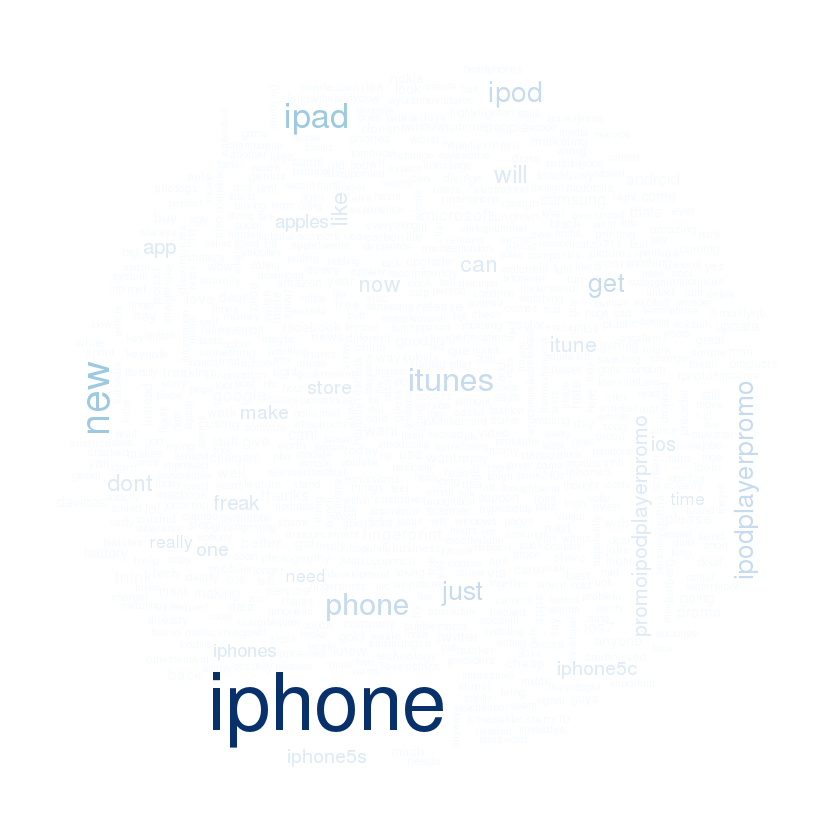

In [34]:

wordcloud(colnames(allTweets),colSums(allTweets),scale=c(4,.5), colors=brewer.pal(9, "Blues"))

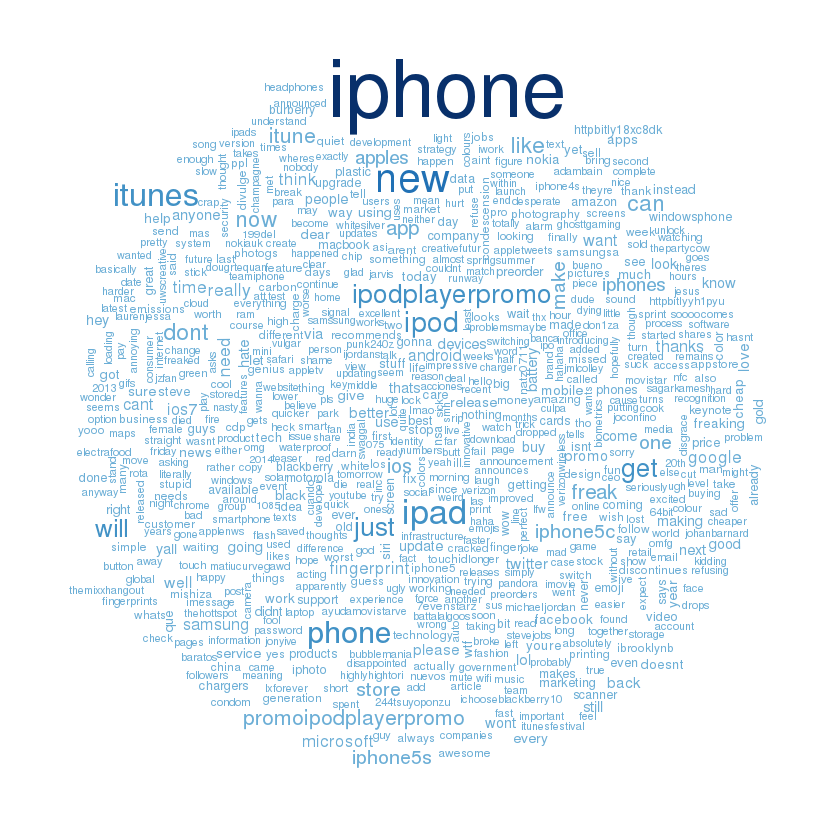

In [35]:
wordcloud(colnames(allTweets),colSums(allTweets),scale=c(4,.5), colors=brewer.pal(9, "Blues")[c(-1, -2, -3, -4)] )